Saving Image.jpg to Image (3).jpg
Uploaded file: Image (3).jpg

Available Filters:
1: grayscale
2: blur
3: sepia
4: edge_detection
Enter the number of the filter you want to apply: 4
Filtered image saved as: filtered_edge_detection_Image (3).jpg

Original Image:


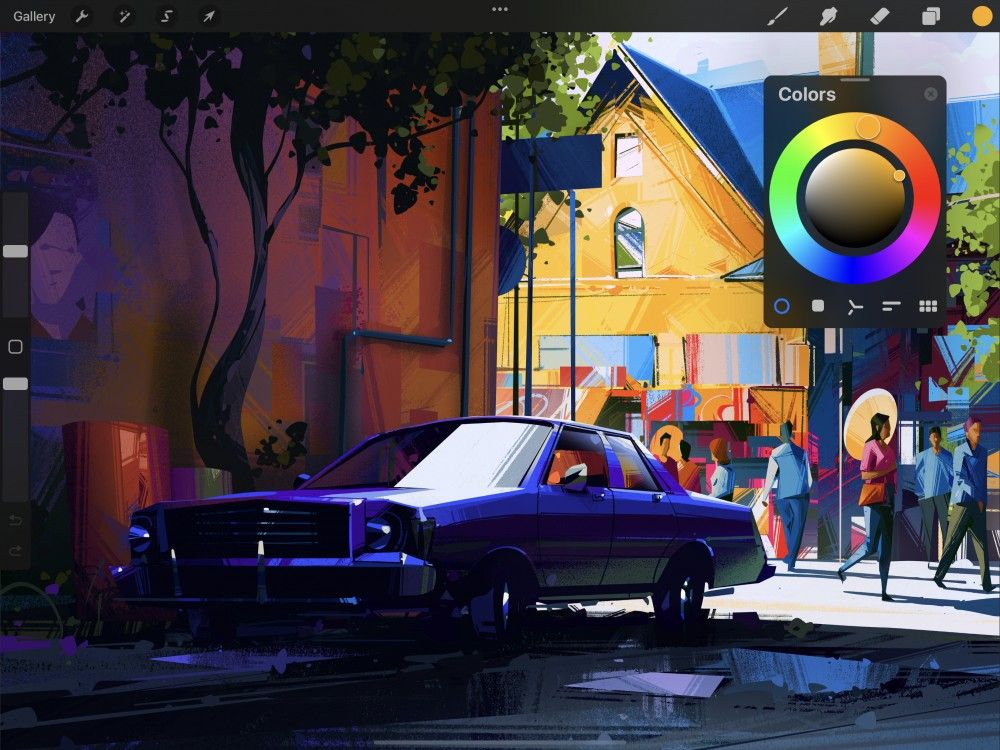


Filtered Image:


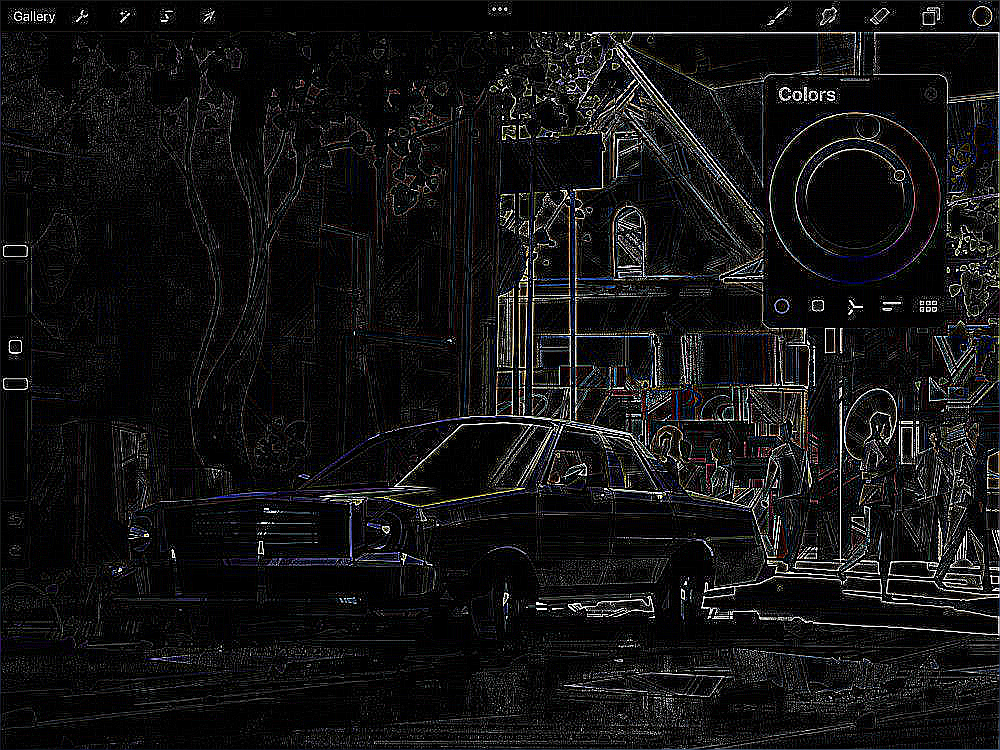

In [ ]:
# Task: Apply filters like grayscale, blur, sepia, edge detection to an image.
# Libraries: OpenCV or PIL

from google.colab import files
from PIL import Image, ImageFilter, ImageOps
from IPython.display import display

def apply_filter(image, filter_type):
    """Applies a filter to a PIL Image."""
    if filter_type == 'grayscale':
        return ImageOps.grayscale(image)
    elif filter_type == 'blur':
        return image.filter(ImageFilter.BLUR)
    elif filter_type == 'sepia':
        # Sepia is a bit more complex, here's a basic approximation
        sepia_img = Image.new('RGB', image.size)
        pixels = image.load()
        sepia_pixels = sepia_img.load()
        for i in range(image.width):
            for j in range(image.height):
                r, g, b = pixels[i, j][:3]  # Ensure we only get RGB values
                tr = int(0.393 * r + 0.769 * g + 0.189 * b)
                tg = int(0.349 * r + 0.686 * g + 0.168 * b)
                tb = int(0.272 * r + 0.534 * g + 0.131 * b)
                sepia_pixels[i, j] = (min(255, tr), min(255, tg), min(255, tb))
        return sepia_img
    elif filter_type == 'edge_detection':
        return image.filter(ImageFilter.FIND_EDGES)
    else:
        print("Invalid filter type.")
        return image

# Upload image from user
uploaded = files.upload()

if len(uploaded) == 0:
    print("No file uploaded.")
else:
    # Get the filename of the uploaded image
    filename = next(iter(uploaded))
    print(f"Uploaded file: {filename}")

    # Open the uploaded image using PIL
    try:
        img = Image.open(filename)

        # Display available filters to the user
        print("\nAvailable Filters:")
        print("1: grayscale")
        print("2: blur")
        print("3: sepia")
        print("4: edge_detection")

        # Get filter choice from user
        filter_choice = input("Enter the number of the filter you want to apply: ")

        filter_map = {
            '1': 'grayscale',
            '2': 'blur',
            '3': 'sepia',
            '4': 'edge_detection'
        }

        selected_filter = filter_map.get(filter_choice)

        if selected_filter:
            # Apply the selected filter
            filtered_img = apply_filter(img, selected_filter)

            # Save the filtered image
            output_filename = f"filtered_{selected_filter}_{filename}"
            filtered_img.save(output_filename)
            print(f"Filtered image saved as: {output_filename}")

            # Display both the original and filtered images
            print("\nOriginal Image:")
            display(img)
            print("\nFiltered Image:")
            display(filtered_img)

        else:
            print("Invalid filter choice.")

    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")